In [35]:
# Path to the dataset
import pandas as pd

file_path = r"C:\Users\moussb\Downloads\archive\amsterdam_weekdays.csv"

# Import the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
df.info



<bound method DataFrame.info of       Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  m

In [36]:
import pandas as pd
import os

# Liste des chemins locaux vers les fichiers CSV
csv_paths = [
    r'C:/Users/moussb/Downloads/archive/amsterdam_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/amsterdam_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/athens_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/athens_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/barcelona_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/barcelona_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/berlin_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/berlin_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/budapest_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/budapest_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/lisbon_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/lisbon_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/london_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/london_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/paris_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/paris_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/rome_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/rome_weekends.csv',
    r'C:/Users/moussb/Downloads/archive/vienna_weekdays.csv',
    r'C:/Users/moussb/Downloads/archive/vienna_weekends.csv',
]

dfs = []
cities_processed = set()

for path in csv_paths:
    try:
        if os.path.exists(path):
            df = pd.read_csv(path)
            city = os.path.basename(path).split('_')[0].capitalize()
            df['city'] = city
            df['is_weekend'] = "weekends" in path
            dfs.append(df)
            cities_processed.add(city)
        else:
            print(f"Le fichier {path} n'existe pas.")
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {path}: {e}")

if dfs:
    original_data = pd.concat(dfs, ignore_index=True)
    print(f"Données combinées avec succès. {len(cities_processed)} villes traitées.")
    
    print("\nAperçu des données:")
    print(original_data.head())
    
    print("\nNombre d'entrées par ville:")
    print(original_data['city'].value_counts())
    
    print("\nNombre d'entrées par jour de la semaine:")
    print(original_data['is_weekend'].value_counts())
    
    print("\nColonnes du DataFrame:")
    print(original_data.columns.tolist())
    
    print("\nInformations sur le DataFrame:")
    original_data.info()
else:
    print("Aucun fichier CSV n'a été chargé.")

# Optionnel : Sauvegarde des données combinées
# original_data.to_csv("combined_airbnb_data.csv", index=False)

Données combinées avec succès. 10 villes traitées.

Aperçu des données:
   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  a

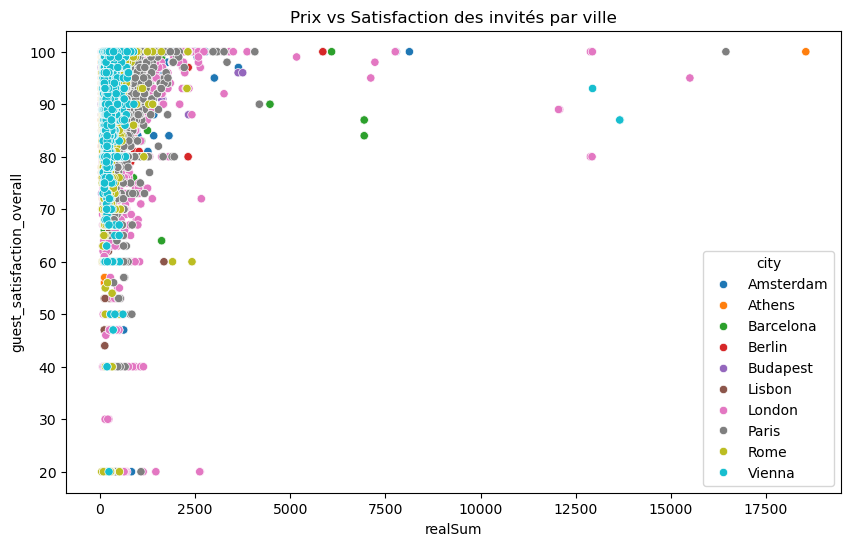

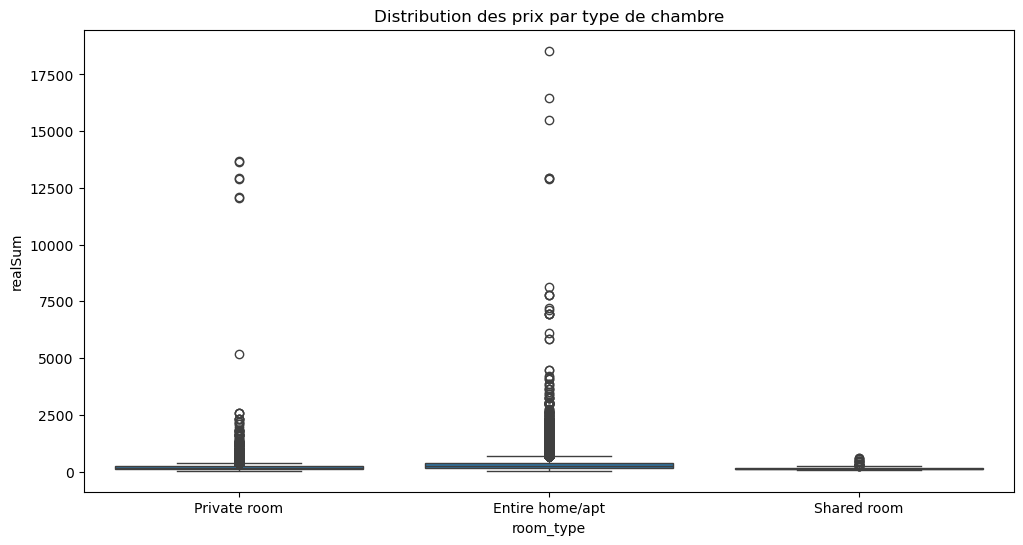

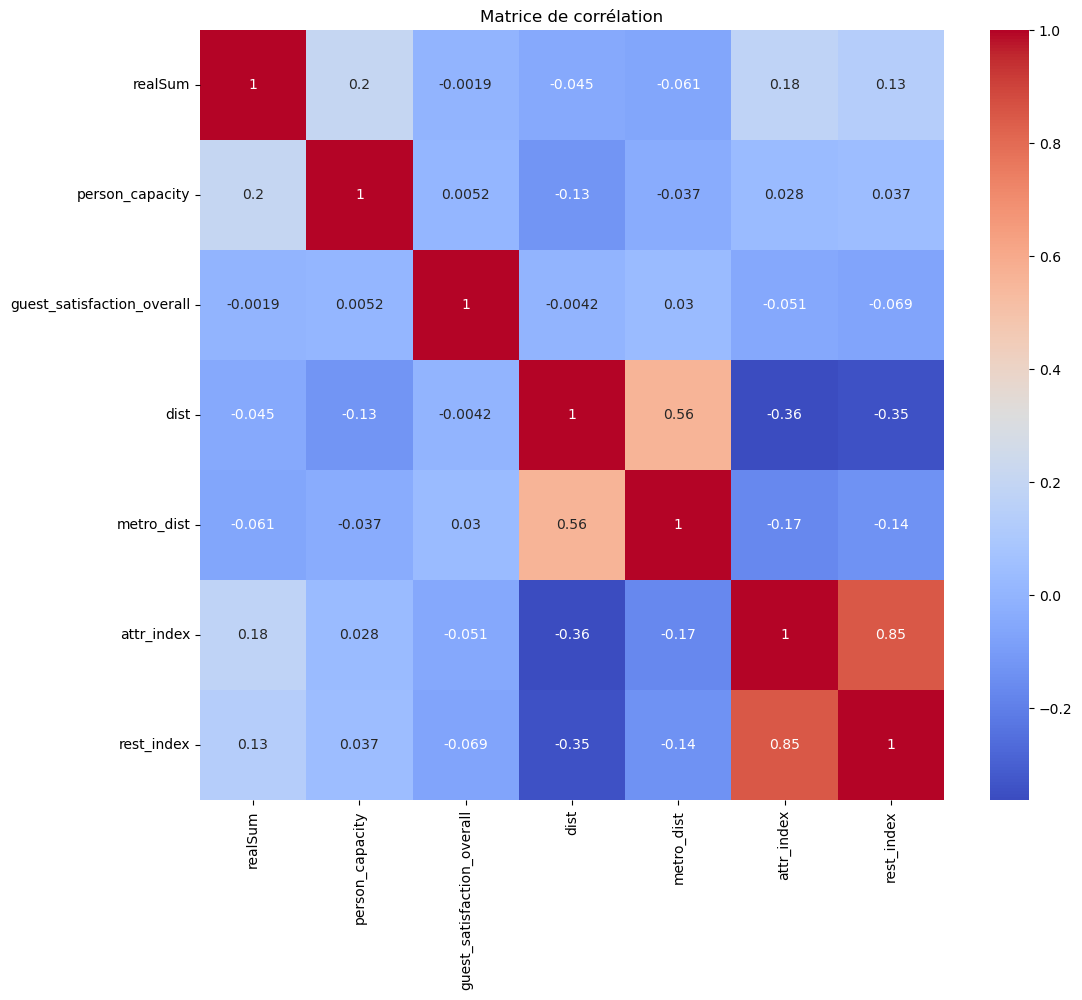

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relation entre le prix et la satisfaction des invités
plt.figure(figsize=(10, 6))
sns.scatterplot(data=original_data, x='realSum', y='guest_satisfaction_overall', hue='city')
plt.title('Prix vs Satisfaction des invités par ville')
plt.show()

# Distribution des prix par type de chambre
plt.figure(figsize=(12, 6))
sns.boxplot(data=original_data, x='room_type', y='realSum')
plt.title('Distribution des prix par type de chambre')
plt.show()

# Corrélation entre les variables numériques
correlation_matrix = original_data[['realSum', 'person_capacity', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'rest_index']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

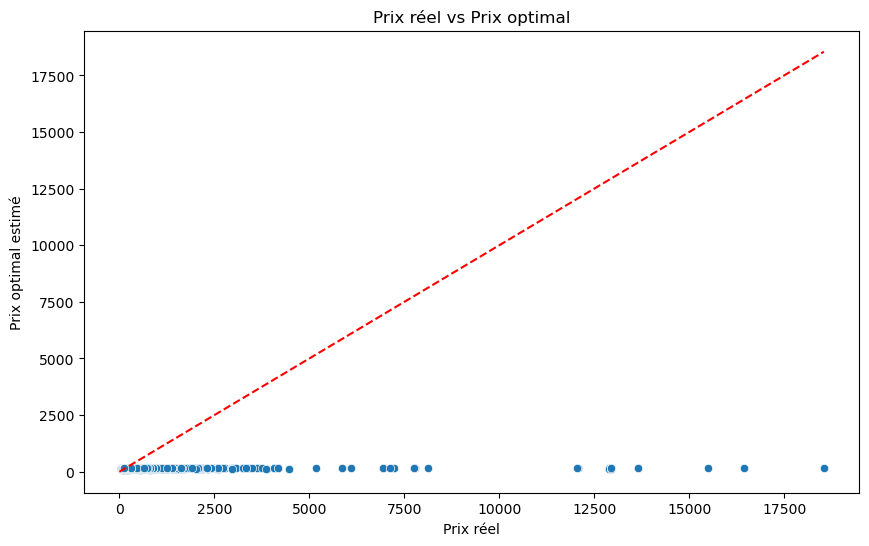

In [46]:
import numpy as np

def calculate_optimal_price(competitors_prices, cost):
    return (np.mean(competitors_prices) + cost) / 2

# Grouper par quartier (en utilisant 'dist' comme proxy)
original_data['neighborhood'] = pd.cut(original_data['dist'], bins=10)

# Simuler un jeu de Cournot simplifié
for neighborhood in original_data['neighborhood'].unique():
    neighborhood_data = original_data[original_data['neighborhood'] == neighborhood]
    
    # Supposons un coût fixe par nuit
    fixed_cost = 20
    
    for index, row in neighborhood_data.iterrows():
        competitors = neighborhood_data[neighborhood_data.index != index]
        optimal_price = calculate_optimal_price(competitors['realSum'], fixed_cost)
        original_data.loc[index, 'optimal_price'] = optimal_price

# Comparer les prix réels aux prix optimaux
plt.figure(figsize=(10, 6))
sns.scatterplot(data=original_data, x='realSum', y='optimal_price')
plt.plot([0, original_data['realSum'].max()], [0, original_data['realSum'].max()], 'r--')
plt.title('Prix réel vs Prix optimal')
plt.xlabel('Prix réel')
plt.ylabel('Prix optimal estimé')
plt.show()

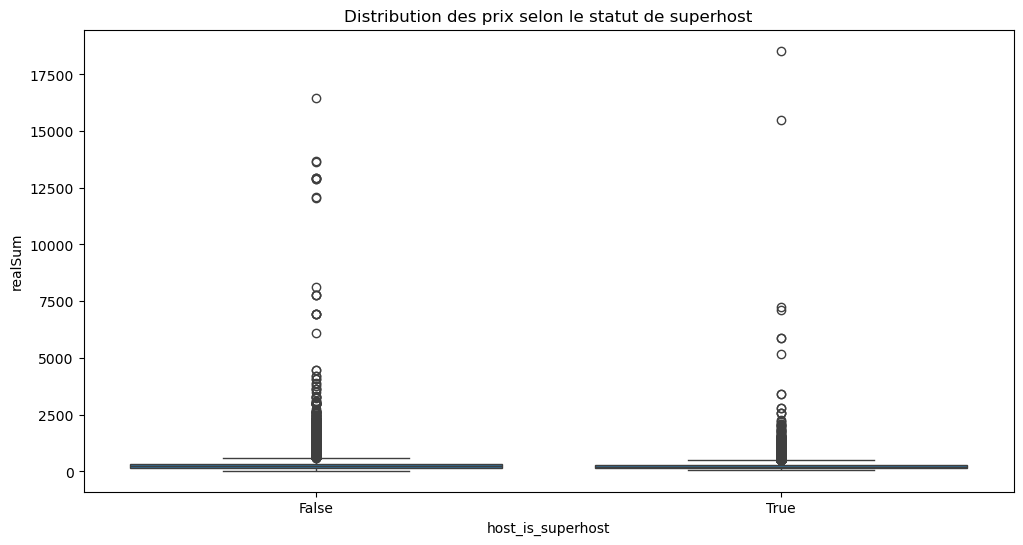

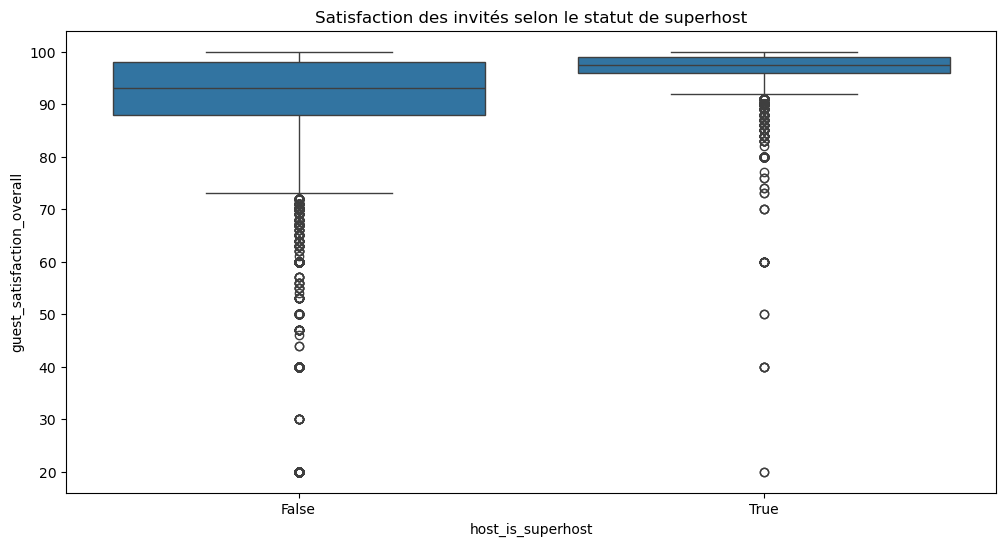

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=original_data, x='host_is_superhost', y='realSum')
plt.title('Distribution des prix selon le statut de superhost')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=original_data, x='host_is_superhost', y='guest_satisfaction_overall')
plt.title('Satisfaction des invités selon le statut de superhost')
plt.show()

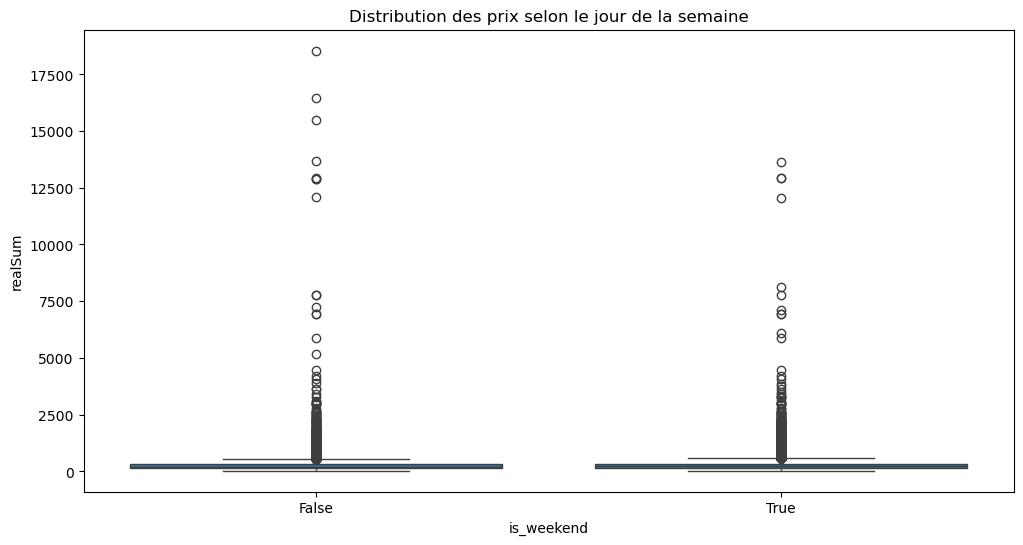

C:\Users\moussb\AppData\Local\Temp\ipykernel_11088\196916252.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekend_premium = original_data.groupby('city').apply(lambda x: x[x['is_weekend']]['realSum'].mean() - x[~x['is_weekend']]['realSum'].mean()).sort_values(ascending=False)


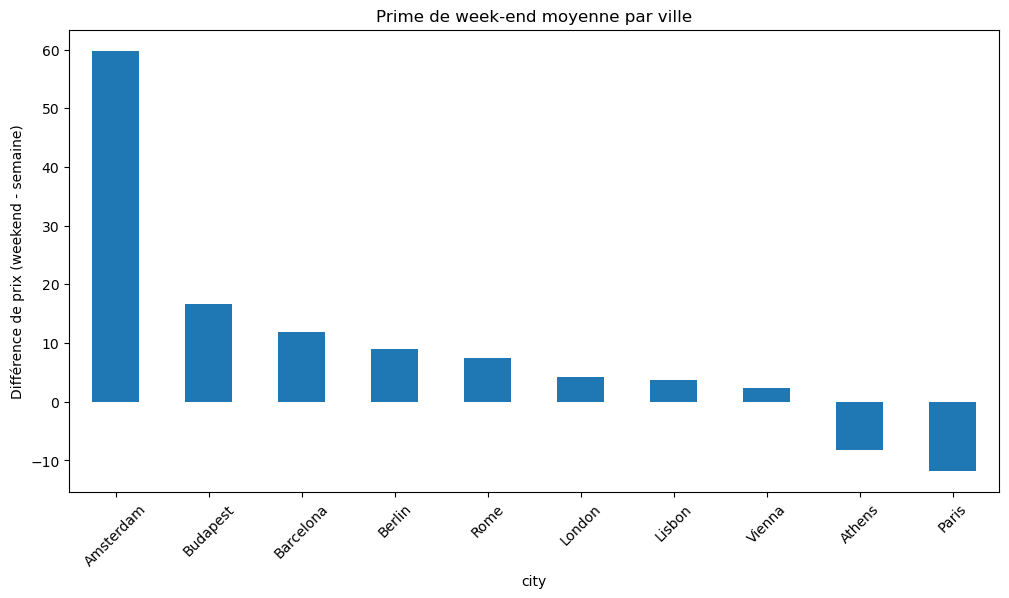

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=original_data, x='is_weekend', y='realSum')
plt.title('Distribution des prix selon le jour de la semaine')
plt.show()

# Calculer la différence de prix moyenne entre semaine et week-end par ville
weekend_premium = original_data.groupby('city').apply(lambda x: x[x['is_weekend']]['realSum'].mean() - x[~x['is_weekend']]['realSum'].mean()).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
weekend_premium.plot(kind='bar')
plt.title('Prime de week-end moyenne par ville')
plt.ylabel('Différence de prix (weekend - semaine)')
plt.xticks(rotation=45)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que la demande soit reflétée par le prix (une simplification)
features = ['person_capacity', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'guest_satisfaction_overall']
X = original_data[features]
y = original_data['realSum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Importance des caractéristiques
feature_importance = pd.DataFrame({'feature': features, 'importance': model.coef_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

MSE: 104301.8926898441
R2 Score: 0.074995885252221
                      feature  importance
0             person_capacity   52.340738
1                        dist   12.150188
3                  attr_index    0.352573
5  guest_satisfaction_overall    0.291232
4                  rest_index   -0.037699
2                  metro_dist  -26.434660


In [50]:
import scipy.stats as stats

# Séparer les données en deux groupes
superhost = original_data[original_data['host_is_superhost'] == True]
non_superhost = original_data[original_data['host_is_superhost'] == False]

# Test de Mann-Whitney pour la satisfaction
statistic, p_value = stats.mannwhitneyu(superhost['guest_satisfaction_overall'], 
                                        non_superhost['guest_satisfaction_overall'])

print(f"Test de Mann-Whitney pour la satisfaction : statistique = {statistic}, p-value = {p_value}")

# Calcul des statistiques descriptives
for group in ['superhost', 'non_superhost']:
    data = superhost if group == 'superhost' else non_superhost
    print(f"\nStatistiques pour {group}:")
    print(data['guest_satisfaction_overall'].describe())
    print(data['realSum'].describe())

Test de Mann-Whitney pour la satisfaction : statistique = 360821722.0, p-value = 0.0

Statistiques pour superhost:
count    13232.000000
mean        96.900242
std          3.441361
min         20.000000
25%         96.000000
50%         97.500000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64
count    13232.000000
mean       254.447726
std        307.207550
min         45.227662
25%        143.748685
50%        197.040881
75%        282.635011
max      18545.450285
Name: realSum, dtype: float64

Statistiques pour non_superhost:
count    38475.000000
mean        91.159038
std          9.748642
min         20.000000
25%         88.000000
50%         93.000000
75%         98.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64
count    38475.000000
mean       288.625905
std        334.341668
min         34.779339
25%        150.328478
50%        217.549801
75%        334.427767
max      16445.614689
Name: realSum, dtyp

In [51]:
# Analyse par ville
for city in original_data['city'].unique():
    city_data = original_data[original_data['city'] == city]
    superhost_city = city_data[city_data['host_is_superhost'] == True]
    non_superhost_city = city_data[city_data['host_is_superhost'] == False]
    
    print(f"\nAnalyse pour {city}:")
    print("Moyenne de satisfaction superhost:", superhost_city['guest_satisfaction_overall'].mean())
    print("Moyenne de satisfaction non-superhost:", non_superhost_city['guest_satisfaction_overall'].mean())
    print("Prix moyen superhost:", superhost_city['realSum'].mean())
    print("Prix moyen non-superhost:", non_superhost_city['realSum'].mean())


Analyse pour Amsterdam:
Moyenne de satisfaction superhost: 97.21996615905245
Moyenne de satisfaction non-superhost: 93.4405641370047
Prix moyen superhost: 539.4313494788588
Prix moyen non-superhost: 586.4813206061049

Analyse pour Athens:
Moyenne de satisfaction superhost: 97.4962439239947
Moyenne de satisfaction non-superhost: 93.13390785548557
Prix moyen superhost: 163.55704380864506
Prix moyen non-superhost: 142.88345078914904

Analyse pour Barcelona:
Moyenne de satisfaction superhost: 96.41828793774319
Moyenne de satisfaction non-superhost: 89.9322984044847
Prix moyen superhost: 297.51635473753765
Prix moyen non-superhost: 292.9197255015037

Analyse pour Berlin:
Moyenne de satisfaction superhost: 97.33333333333333
Moyenne de satisfaction non-superhost: 93.28130081300813
Prix moyen superhost: 253.0648246045613
Prix moyen non-superhost: 241.64640543292407

Analyse pour Budapest:
Moyenne de satisfaction superhost: 97.01574803149606
Moyenne de satisfaction non-superhost: 93.1024819855

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Vérifier si la colonne 'date' existe avant de la convertir et d'ajouter les variables saisonnières
if 'date' in original_data.columns:
    original_data['month'] = pd.to_datetime(original_data['date']).dt.month
    original_data['is_summer'] = original_data['month'].isin([6, 7, 8])
else:
    print("La colonne 'date' n'existe pas dans le DataFrame. La variable 'is_summer' ne sera pas créée.")
    original_data['is_summer'] = False  # Ou vous pouvez choisir de ne pas inclure cette colonne

# Définir les features et la target
features = ['person_capacity', 'dist', 'metro_dist', 'attr_index', 'rest_index', 
            'guest_satisfaction_overall', 'is_weekend', 'is_summer', 'host_is_superhost']

# Vérifier si toutes les features sont présentes dans les colonnes
missing_features = [feature for feature in features if feature not in original_data.columns]
if missing_features:
    print(f"Les colonnes suivantes sont manquantes dans les données : {missing_features}")
    # Retirer les features manquantes pour éviter une autre erreur
    features = [feature for feature in features if feature in original_data.columns]

X = original_data[features].copy()
y = original_data['realSum']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage des résultats
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Importance des caractéristiques
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


La colonne 'date' n'existe pas dans le DataFrame. La variable 'is_summer' ne sera pas créée.
MSE: 44095.525812250184
R2 Score: 0.6089376542802669
                      feature  importance
3                  attr_index    0.333913
1                        dist    0.198991
4                  rest_index    0.184003
2                  metro_dist    0.157040
0             person_capacity    0.058377
5  guest_satisfaction_overall    0.054857
8           host_is_superhost    0.007597
6                  is_weekend    0.005222
7                   is_summer    0.000000


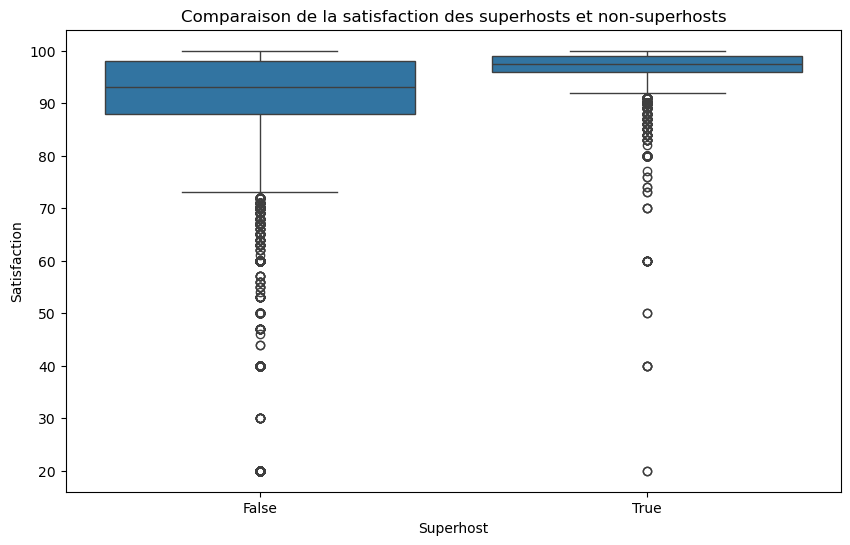

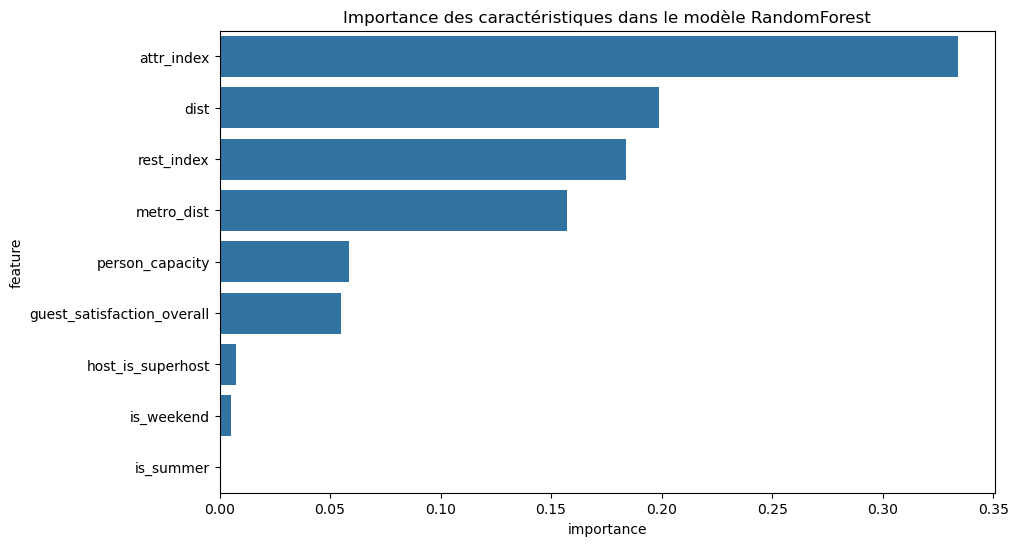

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparaison de la satisfaction entre superhosts et non-superhosts
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='guest_satisfaction_overall', data=original_data)
plt.title("Comparaison de la satisfaction des superhosts et non-superhosts")
plt.xlabel("Superhost")
plt.ylabel("Satisfaction")
plt.show()
# Bar plot pour l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Importance des caractéristiques dans le modèle RandomForest")
plt.show()


La colonne 'date' n'existe pas dans le DataFrame.


In [62]:
# Moyenne de la satisfaction par mois
satisfaction_by_month = original_data.groupby('month')['guest_satisfaction_overall'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='guest_satisfaction_overall', data=satisfaction_by_month)
plt.title("Tendance de la satisfaction moyenne par mois")
plt.xlabel("Mois")
plt.ylabel("Satisfaction moyenne")
plt.show()


KeyError: 'month'

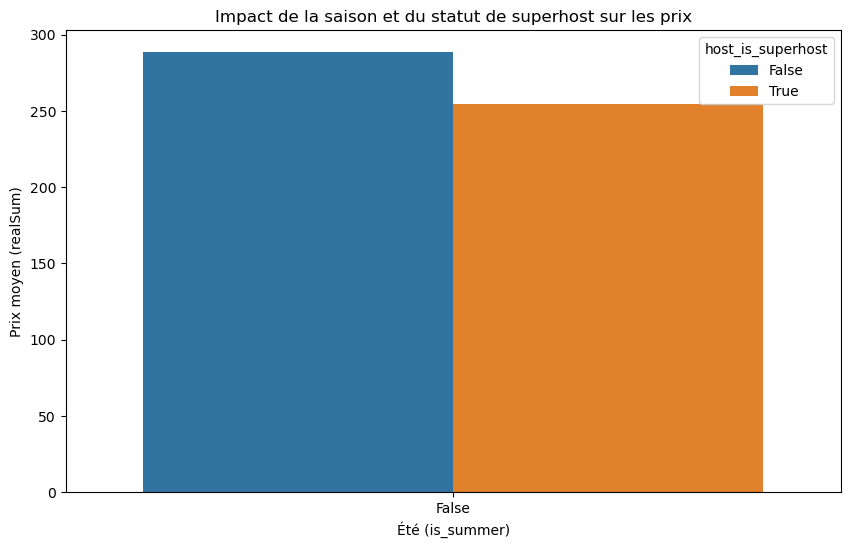

In [63]:
# Prix moyen en fonction de la saison et du statut de superhost
price_by_season_superhost = original_data.groupby(['is_summer', 'host_is_superhost'])['realSum'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='is_summer', y='realSum', hue='host_is_superhost', data=price_by_season_superhost)
plt.title("Impact de la saison et du statut de superhost sur les prix")
plt.xlabel("Été (is_summer)")
plt.ylabel("Prix moyen (realSum)")
plt.show()


In [65]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 220.2 kB/s eta 0:09:28
   ---------------------------------------- 0.0/124.9 MB 220.2 kB/s eta 0:09:28
   ---------------------------------------- 0.0/124.9 MB 164.3 kB/s eta 0:12:41
   ---------------------------------------- 0.0/124.9 MB 164.3 kB/s eta 0:12:41
   ---------------------------------------- 0.1/124.9 MB 193.2 kB/s eta 0:10:47
   ---------------------------------------- 0.1/124.9 MB 193.2 kB/s eta 0:10:47
   ---------------------------------------- 0.1/124.9 MB 171.1 kB/s eta 0:12:10
   ---------------------------------------- 0.1/124.9 MB 171.1 kB/s eta 0:12:10
   ---------------------------------------- 0.1/124.9 MB 180.8 kB/s eta 0:11

In [66]:
from xgboost import XGBRegressor

# Création du modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_xgb = xgb_model.predict(X_test)

print('MSE (XGBoost):', mean_squared_error(y_test, y_pred_xgb))
print('R2 Score (XGBoost):', r2_score(y_test, y_pred_xgb))


MSE (XGBoost): 55373.04007716528
R2 Score (XGBoost): 0.5089227184996338


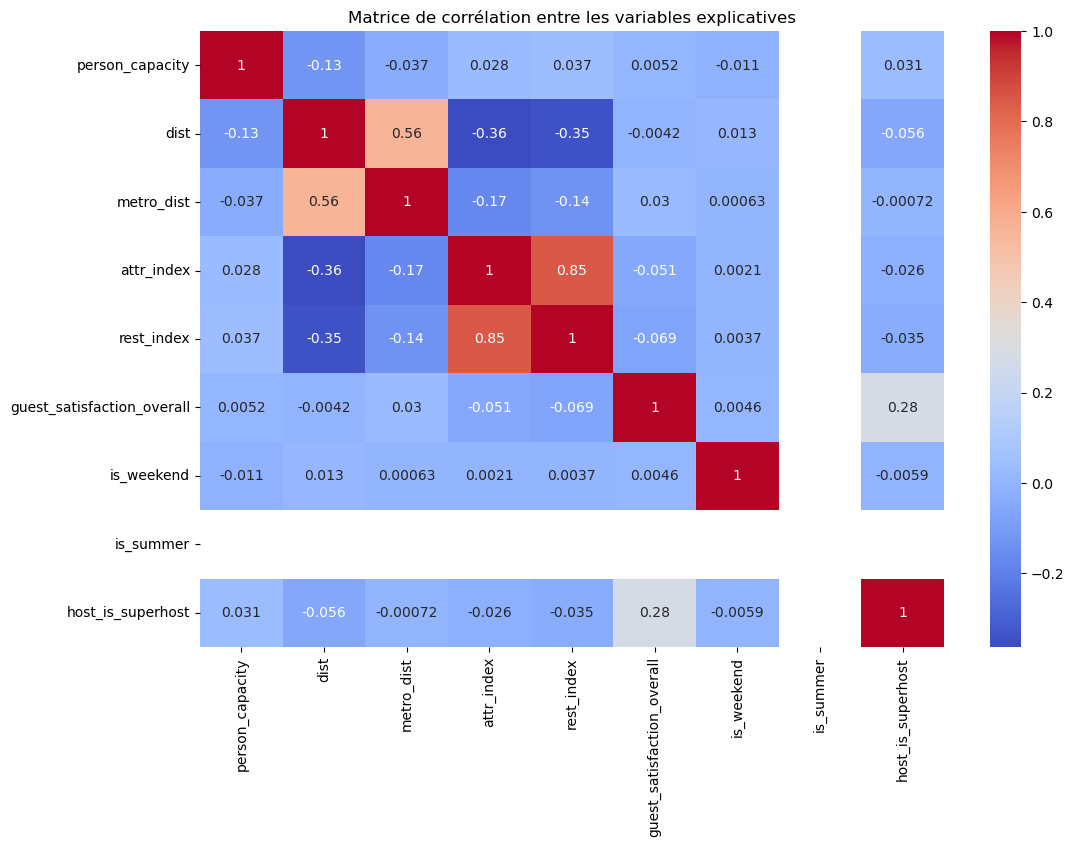

In [67]:
# Matrice de corrélation
corr_matrix = original_data[features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les variables explicatives")
plt.show()
